## Import package

In [4]:
from PIL import Image
import numpy as np
import codecs
import cv2
from matplotlib import pyplot as plt
import pandas as pd

## 獲取訊息

In [3]:
def getMessage(originMessageSrc):
    with open(originMessageSrc,"rb")  as file:
        text = file.read()
        string=""
        print('原始訊息為: '+str(text))
        for index in range(len(text)):
            string=string+""+str(str(bin(text[index]).replace('0b',''))).zfill(8)
            if(index<10):
                print('第'+str(index)+'位為:  '+chr(text[index])+', 二進制為: '+str(str(bin(text[index]).replace('0b','')).zfill(8)))
            else:
                print('第'+str(index)+'位為: '+chr(text[index])+', 二進制為: '+str(bin(text[index]).replace('0b','').zfill(8)))
    print("輸出為："+string) 
    return string

In [5]:
message=getMessage('../message/message.txt')

原始訊息為: b'NIU1112Cryptography'
第0位為:  N, 二進制為: 01001110
第1位為:  I, 二進制為: 01001001
第2位為:  U, 二進制為: 01010101
第3位為:  1, 二進制為: 00110001
第4位為:  1, 二進制為: 00110001
第5位為:  1, 二進制為: 00110001
第6位為:  2, 二進制為: 00110010
第7位為:  C, 二進制為: 01000011
第8位為:  r, 二進制為: 01110010
第9位為:  y, 二進制為: 01111001
第10位為: p, 二進制為: 01110000
第11位為: t, 二進制為: 01110100
第12位為: o, 二進制為: 01101111
第13位為: g, 二進制為: 01100111
第14位為: r, 二進制為: 01110010
第15位為: a, 二進制為: 01100001
第16位為: p, 二進制為: 01110000
第17位為: h, 二進制為: 01101000
第18位為: y, 二進制為: 01111001
輸出為：01001110010010010101010100110001001100010011000100110010010000110111001001111001011100000111010001101111011001110111001001100001011100000110100001111001


## 處理單一一張照片

In [6]:
def LSBHidingSingleImagewithMessage(dirName,photo,message):
    photoName=photo.split('.')[0]
    originImageSrc = dirName+'/'+photo
    grayImageSrc=dirName+'/'+photoName+'GrayScale.jpg'
    afterLSBSrc=dirName+'/'+photoName+'AfterLSB.jpg'
    print('message= '+message)
    print('originImageSrc= '+originImageSrc)
    print('grayImageSrc= '+grayImageSrc)
    print('afterLSBSrc= '+afterLSBSrc)

    originImage = cv2.imread(originImageSrc)
    grayImage=cv2.cvtColor(originImage,cv2.COLOR_BGR2GRAY)
    fig = plt.figure()
    plt.xticks([]), plt.yticks([])
    plt.imshow(grayImage,cmap='gray')
    fig.savefig(grayImageSrc)
    print()

    image = Image.open(grayImageSrc) 
    width,height= image.size[0],image.size[1]
    print("width:"+str(width))
    print("height:"+str(height))
    print()
    
    count = 0
    
    messageLength = len(message)
    for h in range(height):
        for w in range(width):
            pixel = image.getpixel((w,h))
            a=pixel[0]
            b=pixel[1]
            c=pixel[2]

            if count ==  messageLength:
                break

            a= a-(a%2)+int(message[count])
            print('Pixel('+str(w)+','+str(h)+')= '+str(pixel),'AfterHiddedPixel= '+str((a,b-(b%2)+int(message[count]),c-(c%2)+int(message[count]))))

            count+=1
            if count == messageLength:
                image.putpixel((w,h),(a,b,c)) 
                break
            b =b-(b%2)+int(message[count])
            count+=1 
            if count == messageLength:
                image.putpixel((w,h),(a,b,c)) 
                break
            c= c-(c%2)+int(message[count])
            count+=1
            if count == messageLength:
                image.putpixel((w,h),(a,b,c))
                break
            if count % 3 == 0:
                image.putpixel((w,h),(a,b,c))

    image.save(afterLSBSrc)

    LSBImage = cv2.imread(afterLSBSrc)
    LSBImage = cv2.cvtColor(LSBImage,cv2.COLOR_BGR2GRAY) 
    grayscaleImage = cv2.imread(grayImageSrc)
    grayscaleImage = cv2.cvtColor(grayscaleImage,cv2.COLOR_BGR2GRAY) 
    diff = grayscaleImage - LSBImage
    mse = np.mean(np.square(diff))
    PSNR = 10 * np.log10(255 * 255 / mse)

    print('峰值信噪比：'+str(PSNR))

message= 01001110010010010101010100110001001100010011000100110010010000110111001001111001011100000111010001101111011001110111001001100001011100000110100001111001
originImageSrc= ../images/Lenna.jpeg
grayImageSrc= ../images/LennaGrayScale.jpg
afterLSBSrc= ../images/LennaAfterLSB.jpg

width:640
height:480

Pixel(0,0)= (255, 255, 255) AfterHiddedPixel= (254, 254, 254)
Pixel(1,0)= (255, 255, 255) AfterHiddedPixel= (254, 254, 254)
Pixel(2,0)= (255, 255, 255) AfterHiddedPixel= (255, 255, 255)
Pixel(3,0)= (255, 255, 255) AfterHiddedPixel= (255, 255, 255)
Pixel(4,0)= (255, 255, 255) AfterHiddedPixel= (255, 255, 255)
Pixel(5,0)= (255, 255, 255) AfterHiddedPixel= (255, 255, 255)
Pixel(6,0)= (255, 255, 255) AfterHiddedPixel= (254, 254, 254)
Pixel(7,0)= (255, 255, 255) AfterHiddedPixel= (255, 255, 255)
Pixel(8,0)= (255, 255, 255) AfterHiddedPixel= (254, 254, 254)
Pixel(9,0)= (255, 255, 255) AfterHiddedPixel= (255, 255, 255)
Pixel(10,0)= (255, 255, 255) AfterHiddedPixel= (254, 254, 254)
Pixel(11,0)

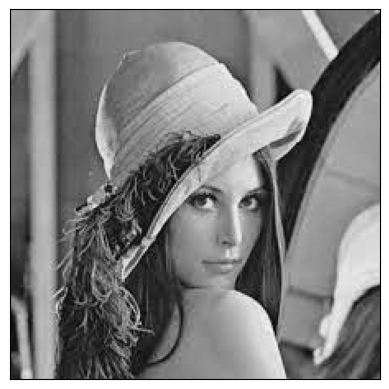

In [7]:
LSBHidingSingleImagewithMessage('../images','Lenna.jpeg',message)

In [8]:
def LSBHidingSingleImagewithOutMessage(dirName,photo,message):
    photoName=photo.split('.')[0]
    originImageSrc = dirName+'/'+photo
    grayImageSrc=dirName+'/'+photoName+'GrayScale.jpg'
    afterLSBSrc=dirName+'/'+photoName+'AfterLSB.jpg'

    originImage = cv2.imread(originImageSrc)
    grayImage=cv2.cvtColor(originImage,cv2.COLOR_BGR2GRAY)
    fig = plt.figure()
    fig.savefig(grayImageSrc)
    

    image = Image.open(grayImageSrc) 
    width,height= image.size[0],image.size[1]

    count = 0

    messageLength = len(message)
    for h in range(height):
        for w in range(width):
            pixel = image.getpixel((w,h))
            a=pixel[0]
            b=pixel[1]
            c=pixel[2]

            if count ==  messageLength:
                break

            a= a-(a%2)+int(message[count])

            count+=1
            if count == messageLength:
                image.putpixel((w,h),(a,b,c)) 
                break
            b =b-(b%2)+int(message[count])
            count+=1 
            if count == messageLength:
                image.putpixel((w,h),(a,b,c)) 
                break
            c= c-(c%2)+int(message[count])
            count+=1
            if count == messageLength:
                image.putpixel((w,h),(a,b,c))
                break
            if count % 3 == 0:
                image.putpixel((w,h),(a,b,c))

    image.save(afterLSBSrc)
    
    LSBImage = cv2.imread(afterLSBSrc)
    LSBImage = cv2.cvtColor(LSBImage,cv2.COLOR_BGR2GRAY) 
    grayscaleImage = cv2.imread(grayImageSrc)
    grayscaleImage = cv2.cvtColor(grayscaleImage,cv2.COLOR_BGR2GRAY) 
    diff = grayscaleImage - LSBImage
    mse = np.mean(np.square(diff))
    PSNR = 10 * np.log10(255 * 255 / mse)
    return PSNR

In [9]:
LSBHidingSingleImagewithOutMessage('../images','Lenna.jpeg',message)

/tmp/ipykernel_741060/4097800756.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  PSNR = 10 * np.log10(255 * 255 / mse)


inf

<Figure size 640x480 with 0 Axes>

Process 

In [ ]:
def LSBMultipleImage(dirName):
    